# Regeressão Linear Múltipla

Prever o preço de um automovel.

Fonte: https://www.kaggle.com/hellbuoy/car-price-prediction

In [29]:
# Pandas: biblioteca para manipular a base de dados 
import pandas as pd 

# read_csv: método para ler a base de dados no formato csv 
cars = pd.read_csv('/content/CarPrice_Assignment.csv') 

# visualização das primeiras linhas da base de dados 
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [30]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


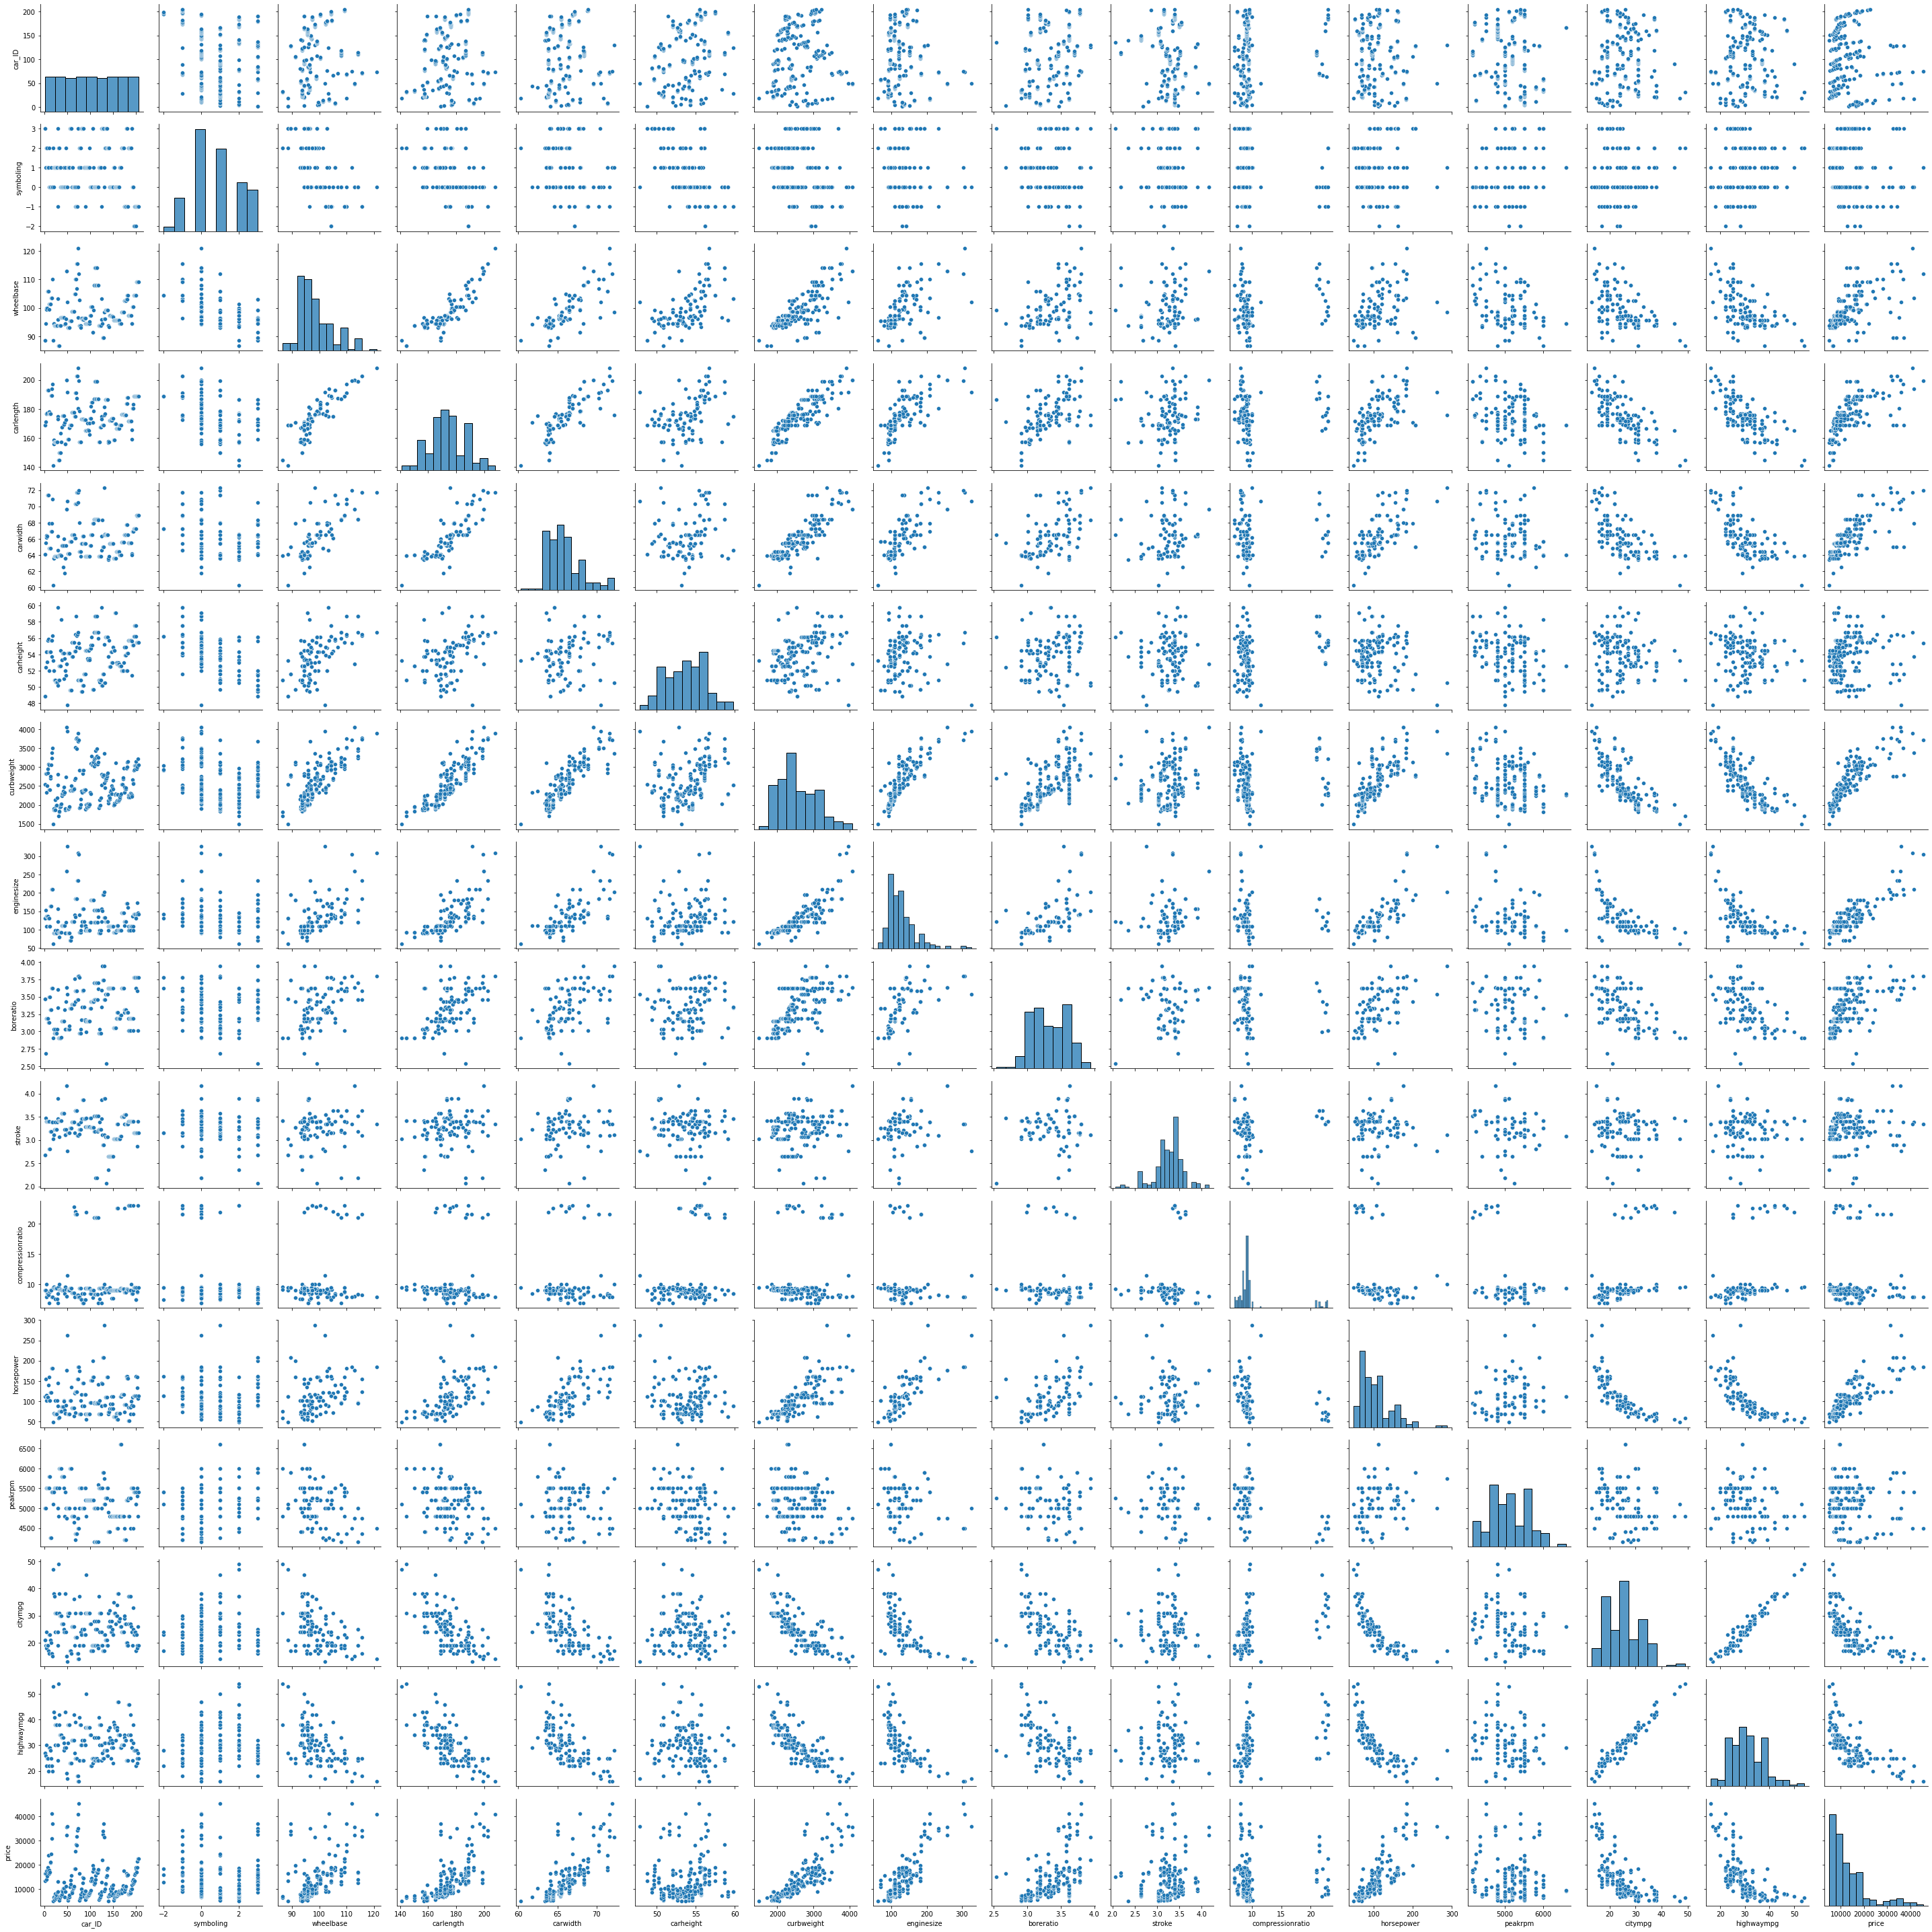

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Pairplot
# Permite uma análise visual correlação 
sns.pairplot(cars)
plt.tight_layout()

In [35]:
from sklearn.utils import shuffle


In [38]:
#Tratamento e divisão
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()


cars['fueltype']=lab.fit_transform(cars['fueltype'])
cars['aspiration']=lab.fit_transform(cars['aspiration'])
cars['doornumber']=lab.fit_transform(cars['doornumber'])
cars['drivewheel']=lab.fit_transform(cars['drivewheel'])
cars['carbody']=lab.fit_transform(cars['carbody'])
cars['enginelocation']=lab.fit_transform(cars['enginelocation'])
cars['carbody']=lab.fit_transform(cars['carbody'])
cars['enginetype']=lab.fit_transform(cars['enginetype'])
cars['cylindernumber']=lab.fit_transform(cars['cylindernumber'])
cars['fuelsystem']=lab.fit_transform(cars['fuelsystem'])
cars['CompanyName']=lab.fit_transform(cars['CompanyName'])

car = cars.drop('price', axis=1).values
print(car)
preco = cars['price'].values
print(preco)

[[ 1.00e+00  3.00e+00  1.00e+00 ...  5.00e+03  2.10e+01  2.70e+01]
 [ 2.00e+00  3.00e+00  1.00e+00 ...  5.00e+03  2.10e+01  2.70e+01]
 [ 3.00e+00  1.00e+00  1.00e+00 ...  5.00e+03  1.90e+01  2.60e+01]
 ...
 [ 2.03e+02 -1.00e+00  2.60e+01 ...  5.50e+03  1.80e+01  2.30e+01]
 [ 2.04e+02 -1.00e+00  2.60e+01 ...  4.80e+03  2.60e+01  2.70e+01]
 [ 2.05e+02 -1.00e+00  2.60e+01 ...  5.40e+03  1.90e+01  2.50e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    13645.    15645.     8845.     8495. 

In [39]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [40]:
from sklearn.model_selection import train_test_split
car_train, car_test, train_q, test_q = train_test_split(car, preco, test_size=0.3, random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(car_train, train_q)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Calcula previsões
qualidadePrevista = reg.predict(car_test)

In [45]:


import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score


print("Mean squared error: %.2f"
      % mean_squared_error(test_q, qualidadePrevista))



Mean squared error: 11173268.21


In [46]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [ 7.80326529e+00  2.37390960e+02 -1.96446605e+02  1.34940609e+04
  1.57658349e+03 -1.68952931e+03 -1.28468782e+03  7.78607256e+02
  1.05967623e+04  1.75945043e+02 -6.54182445e+01  6.87333546e+02
  1.73031507e+02  2.68328423e+00  1.67981138e+02 -1.75550627e+02
  8.20958678e+01  1.21475753e+02 -7.93390995e+02 -2.07098510e+03
  1.04364286e+03  1.27662194e+01  1.22253497e+00 -1.37389006e+02
  4.26449749e+01]


In [48]:
print('Variance score: %.2f' % r2_score(test_q, qualidadePrevista)) 

Variance score: 0.84
